In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [14]:
weather = pd.read_csv('Weather_data.csv',parse_dates =['datetime (UTC)'])

In [15]:
weather.head()

,datetime (UTC),"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2010-01-01 00:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.26,16.39,2.60,101046.38,0.89,287.01,408.35,1.0
1,2010-01-01 01:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.67,16.29,2.91,101037.96,0.86,360.79,411.02,1.0
2,2010-01-01 02:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.16,15.89,3.26,101017.26,0.87,291.54,410.67,1.0
3,2010-01-01 03:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.46,15.33,3.17,101022.56,0.82,357.11,410.95,1.0
4,2010-01-01 04:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.53,15.11,2.95,100940.03,0.80,459.91,410.00,0.9


In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100057 entries, 0 to 100056
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   datetime (UTC)                     100057 non-null  datetime64[ns]
 1   coordinates (lat,lon)              100057 non-null  object        
 2   model (name)                       100057 non-null  object        
 3   model elevation (surface)          100057 non-null  float64       
 4   utc_offset (hrs)                   100057 non-null  float64       
 5   temperature (degC)                 100057 non-null  float64       
 6   dewpoint_temperature (degC)        100057 non-null  float64       
 7   wind_speed (m/s)                   100057 non-null  float64       
 8   mean_sea_level_pressure (Pa)       100057 non-null  float64       
 9   relative_humidity ((0-1))          100057 non-null  float64       
 10  surface_solar_radiat

In [17]:
weather = weather.rename(columns={'datetime (UTC)':'Date Time',
                                 'coordinates (lat,lon)':'coordinates',
                                  'model (name)':'model',
                                  'model elevation (surface)':'model elevation'
                                  ,'utc_offset (hrs)':'utc',
                                   'temperature (degC)':'T (degC)',
                                   'dewpoint_temperature (degC)':'Tdew (degC)',
                                   'wind_speed (m/s)':'wv (m/s)',
                                   'mean_sea_level_pressure (Pa)':'p (Pa)',
                                   'relative_humidity ((0-1))':'rh (%)',
                                   
                                  })
weather.drop(columns=['coordinates','model','model elevation','utc'], axis=1, inplace=True)

weather['p (Pa)'] = weather['p (Pa)'].apply(lambda x: x*0.01)
weather = weather.rename(columns={'p (Pa)':'p (mbar)'
                                  })

In [18]:
weather.head()

,Date Time,T (degC),Tdew (degC),wv (m/s),p (mbar),rh (%),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2010-01-01 00:00:00,18.26,16.39,2.60,1010.4638,0.89,287.01,408.35,1.0
1,2010-01-01 01:00:00,18.67,16.29,2.91,1010.3796,0.86,360.79,411.02,1.0
2,2010-01-01 02:00:00,18.16,15.89,3.26,1010.1726,0.87,291.54,410.67,1.0
3,2010-01-01 03:00:00,18.46,15.33,3.17,1010.2256,0.82,357.11,410.95,1.0
4,2010-01-01 04:00:00,18.53,15.11,2.95,1009.4003,0.80,459.91,410.00,0.9


In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100057 entries, 0 to 100056
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date Time                          100057 non-null  datetime64[ns]
 1   T (degC)                           100057 non-null  float64       
 2   Tdew (degC)                        100057 non-null  float64       
 3   wv (m/s)                           100057 non-null  float64       
 4   p (mbar)                           100057 non-null  float64       
 5   rh (%)                             100057 non-null  float64       
 6   surface_solar_radiation (W/m^2)    100057 non-null  float64       
 7   surface_thermal_radiation (W/m^2)  100057 non-null  float64       
 8   total_cloud_cover (0-1)            100057 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 6.9 MB


In [20]:
weather.describe()

,T (degC),Tdew (degC),wv (m/s),p (mbar),rh (%),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
count,100057.000000,100057.000000,100057.000000,100057.000000,100057.000000,100057.000000,100057.000000,100057.000000
mean,14.802318,9.503857,3.909783,1016.131329,0.729192,182.921098,324.615891,0.587394
std,5.575031,3.598004,2.050064,9.258468,0.158500,265.316443,32.930795,0.356411
min,0.860000,-2.320000,0.020000,967.259200,0.120000,0.000000,232.150000,0.000000
25%,10.830000,6.860000,2.300000,1011.699400,0.620000,0.000000,300.510000,0.270000
50%,13.920000,9.090000,3.670000,1017.037100,0.760000,7.220000,322.900000,0.650000
75%,18.000000,11.860000,5.280000,1022.016500,0.850000,316.230000,347.150000,0.940000
max,40.360000,22.940000,13.230000,1033.975300,1.090000,1112.140000,458.760000,1.000000


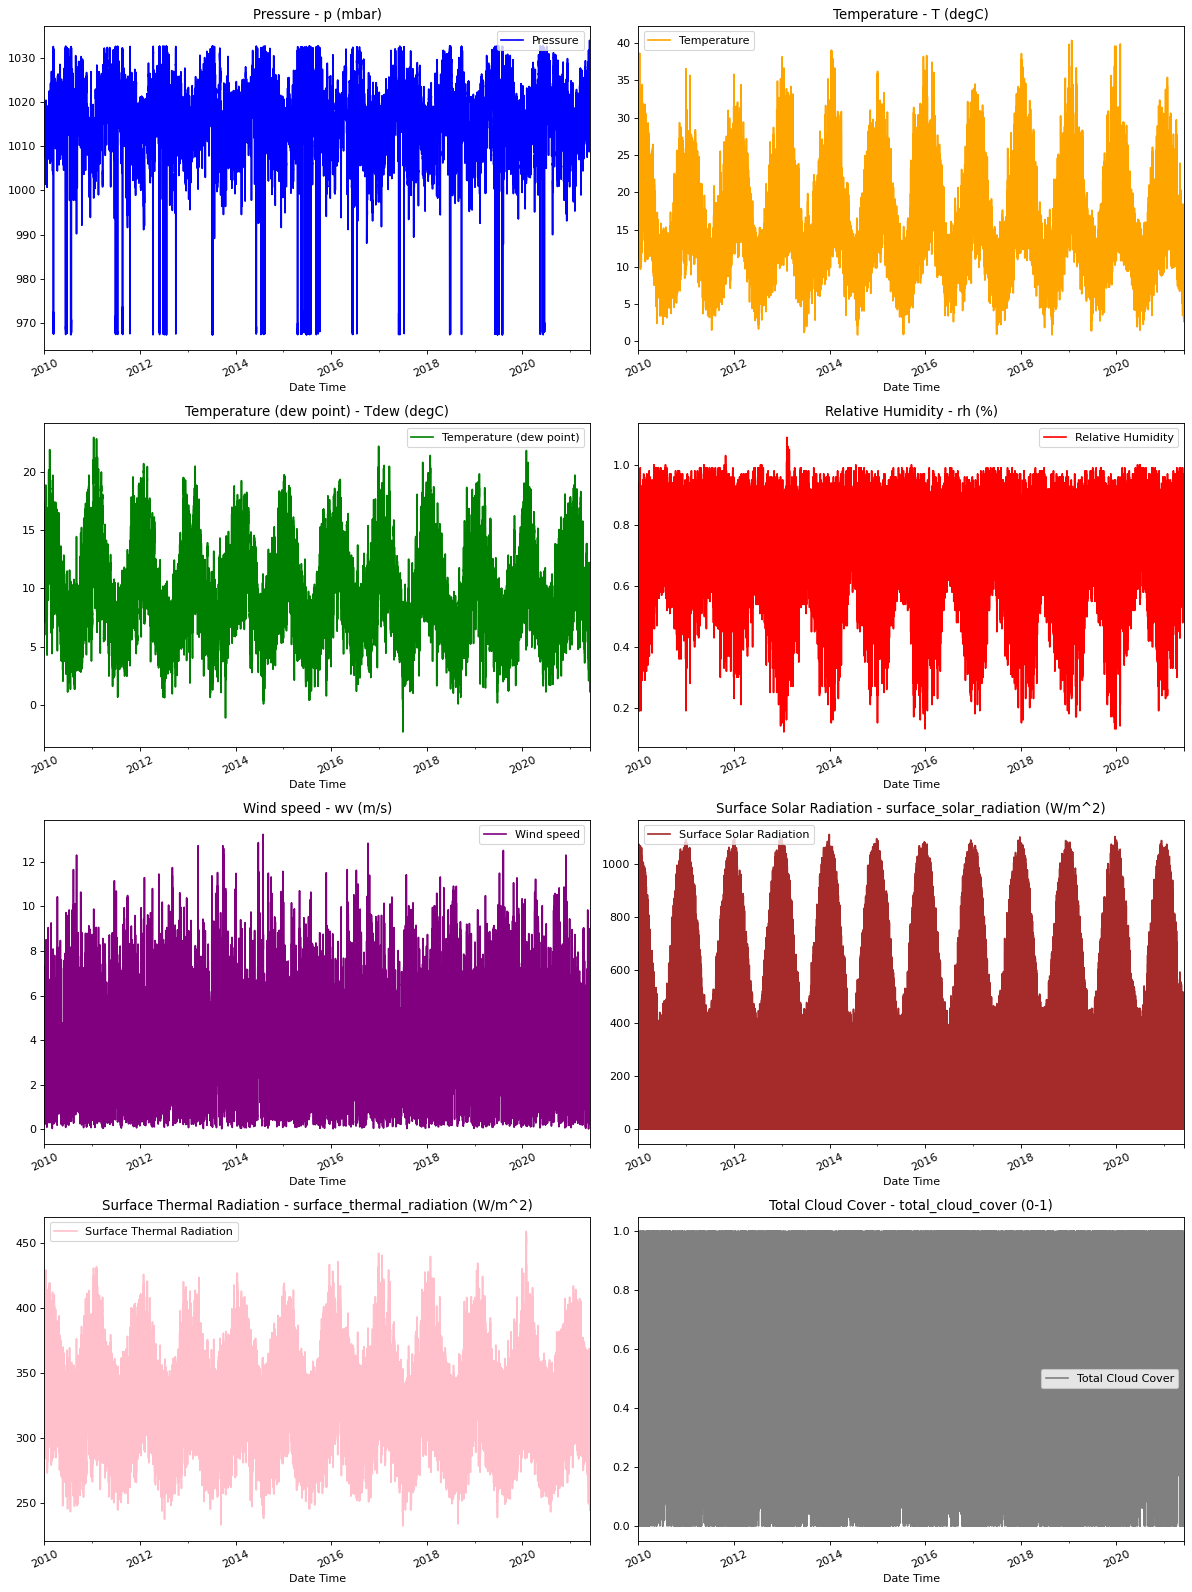

In [21]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature (dew point)",
    "Relative Humidity",
    "Wind speed",
    "Surface Solar Radiation",
    "Surface Thermal Radiation",
    "Total Cloud Cover"
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tdew (degC)",
    "rh (%)",
    "wv (m/s)",
    "surface_solar_radiation (W/m^2)",
    "surface_thermal_radiation (W/m^2)",
    "total_cloud_cover (0-1)"
    
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=4, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(weather)


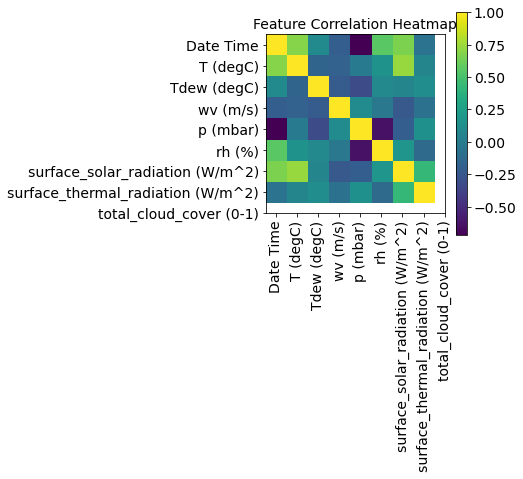

In [22]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(weather)


In [23]:
for i,v in enumerate(titles):
    print(i,v)

0 Pressure
1 Temperature
2 Temperature (dew point)
3 Relative Humidity
4 Wind speed
5 Surface Solar Radiation
6 Surface Thermal Radiation
7 Total Cloud Cover


In [33]:
print("The selected parameters are:",", ".join([titles[i] for i in [0, 1, 2, 3, 4, 5 ,7]]))
      
selected_features = [feature_keys[i] for i in [0, 1, 2, 3, 4, 5 ,7]]
features =weather[selected_features]
features.index = weather[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]


The selected parameters are: Pressure, Temperature, Temperature (dew point), Relative Humidity, Wind speed, Surface Solar Radiation, Total Cloud Cover


In [34]:
split_fraction = 0.715
train_split = int(split_fraction * int(weather.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 1


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std


In [36]:
features.head()

,0,1,2,3,4,5,6
0,-0.572659,0.602596,1.868083,1.010458,-0.628144,0.383764,1.171198
1,-0.581543,0.675556,1.840567,0.820541,-0.476359,0.659915,1.171198
2,-0.603384,0.584800,1.730503,0.883847,-0.304989,0.400719,1.171198
3,-0.597792,0.638186,1.576414,0.567319,-0.349055,0.646142,1.171198
4,-0.684870,0.650643,1.515879,0.440708,-0.456774,1.030913,0.891122


In [37]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [39]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [41]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


In [42]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 7)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5120      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [43]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

277/277 [==============================] - 209s 739ms/step - loss: 0.6706 - val_loss: 0.5829

Epoch 00001: val_loss improved from inf to 0.58291, saving model to model_checkpoint.h5


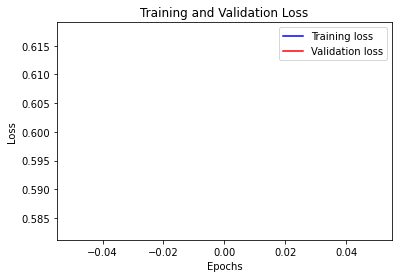

In [44]:

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

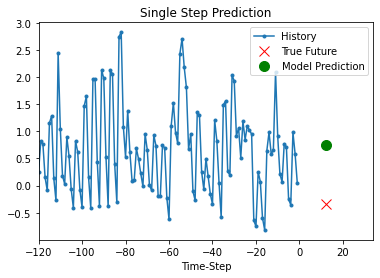

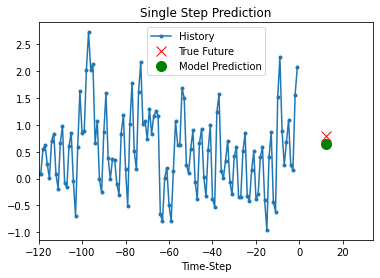

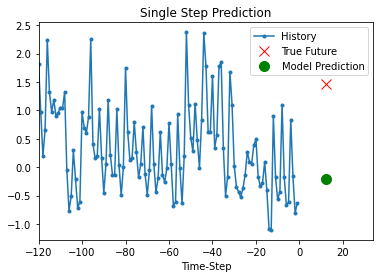

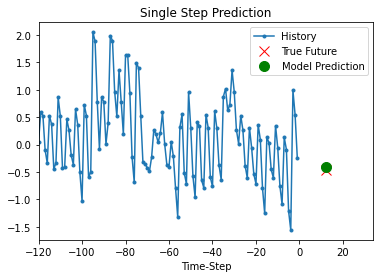

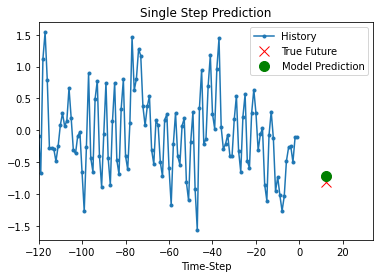

In [45]:

def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )